# This is a one stop notebook for the problem metric - **AUC**

# As always, remember to upvote if you liked the content :)

# This Notebook provides a very intuitive understanding of the ROC-AUC Metric. Stick till the end of the Notebook, I promise it will be very fruitful.

# Basic Terms

**First let's get some basic terms out of the way before proceeding further.**

# Confusion Matrix

I am very sure that everyone is familiar with confusion matrix and terms revolving around it. But bear with me.

![](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png)

The ones we are interested are: **Recall** and **Specificity**

# Recall aka TPR (True Positive Rate)

![](https://miro.medium.com/max/444/1*HgxNKuUwXk9JHYBCt_KZNw.png)

# Specificity

![](https://miro.medium.com/max/308/1*f7NmMcQtfes1ng7jtjNtHQ.png)

# FPR (False Positive Rate)

![](https://miro.medium.com/max/306/1*3GhDfiuhvINF5-9eL8g6Pw.png)

Its no secret that we want **TPR** to **Increase** and **FPR** to **Decrease**.

# ROC Curve


The **receiver operating characteristic** curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values. Let’s explain more.


Many of the classification models are probabilistic, i.e. they predict the probability of a sample being a cat. They then compare that output probability with some cut-off threshold and if it is larger than the threshold they predict its label as cat, otherwise as non-cat. 

As an example your model may predict the below probabilities for 4 sample images: 

    [0.45, 0.6, 0.7, 0.3]

Then depending on the threshold values below, you will get different labels:

    cut-off=0.5:                    predicted-labels = [0,1,1,0]

    cut-off=0.2:                    predicted-labels = [1,1,1,1]

    cut-off=0.8:                    predicted-labels = [0,0,0,0]

As you can see by varying the threshold values, we will get completely different labels. And as you can imagine each of these scenarios would result in a different precision and recall (as well as TPR, FPR) rates.
ROC curve essentially finds out the TPR and FPR for various threshold values and plots TPR against the FPR. 

A sample ROC curve is shown in below Figure.


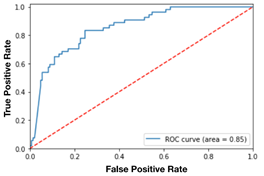

As we can see from this example, the lower the cut-off threshold on positive class, the more samples predicted as positive class, i.e. higher true positive rate (recall) and also higher false positive rate (corresponding to the right side of this curve). Therefore, there is a trade-off between how high the recall could be versus how much we want to bound the error (FPR).

ROC curve is a popular curve to look at overall model performance and pick a good cut-off threshold for the model.

•	ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context.

•	You can't actually see the thresholds used to generate the curve on the ROC curve itself.


# AUC

The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values (and therefore it is threshold invariant).

AUC calculates the area under the ROC curve, and therefore it is between 0 and 1. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.


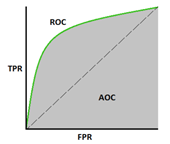

On high-level, the higher the AUC of a model the better it is. But sometimes threshold independent measure is not what you want, e.g. you may care about your model recall and require that to be higher than 99% (while it has a reasonable precision or FPR). In that case, you may want to tune your model threshold such that it meets your minimum requirement on those metrics (and you may not care even if you model AUC is not too high).

Therefore in order to decide how to evaluate your classification model performance, perhaps you want to have a good understanding of the business/problem requirement and the impact of low recall vs. low precision, and decide what metric to optimize for.

* AUC is useful as a single number summary of classifier performance
* Higher value = better classifier
* If you randomly chose one positive and one negative observation, **AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation**.

# ROC-AUC (Intuitive Explanation)

Above ROC and AUC sections must have given you basic idea of what they are. Now **let's get into the intuitive part and see how exactly ROC curve is drawn.**


# Ideal Case (When classes are perfectly separable)

![](https://miro.medium.com/max/660/1*Uu-t4pOotRQFoyrfqEvIEg.png)

![](https://miro.medium.com/max/404/1*HmVIhSKznoW8tFsCLeQjRw.png)

* We start with threshold = 1 (Visualize the steps in the above diagrams as we proceed)

  TPR = 0 and FPR = 0 since TP and FP = 0 because at threshold = 1 every point is predicted negative
   
  That means right now we are at bottom left corner of ROC graph i.e. (0, 0).

   
* Threshold --> 1 to 0.5
   
  TPR starts increasing as TPs are increasing.
   
  FPR remains 0 as FP = 0, because classes are perfectly seperable
   
  Thats when the graph starts to go perpendicularly upwards i.e from (0, 0) to (0, 1).
   
  And at threshold = 0.5, we reach at top left corner of the ROC curve
   

* Threshold --> 0.5 to 0

  Now, the true negative labels start coming in. And if they are predicted +ve, this would be a FP.
   
  And hence the FPR would start increasing from here on with no increase in FPR.
   
  In graph, this would be a horizontal line from (0, 1) to (1, 1).


A simple would mathematics is required to calculate the Area Under Curve of this square which is --> 1.

**This was the ideal case.**

# Practicle Case (When classes are overlapping)

![](https://miro.medium.com/max/634/1*yF8hvKR9eNfqqej2JnVKzg.png)

![](https://miro.medium.com/max/425/1*-tPXUvvNIZDbqXP0qqYNuQ.png)

* We start with threshold = 1 (Again visualize the steps in the above diagrams as we proceed)

  TPR = 0 and FPR = 0 since TP and FP = 0 because at threshold = 1 every point is predicted negative
   
  That means right now we are at bottom left corner of ROC graph i.e. (0, 0).

   
* Threshold --> 1 to 0
   
  Now things here won't go as they did in Ideal case. Because now somewhere in threshold range of 1 to 0.5, negative labels would start coming in.
   
  **TPR starts increasing** as TPs are increasing.
   
  After some decrease of threshold, **FPR also starts increasing**, because classes are perfectly seperable
   
  When FPR starts increasing from 0, thats when the ROC curve starts to bend from the perpendicular line (0, 0), (0, 1).
   
  Our main our is to find the sweet spot where the FPR is not increased much (subject to the problem) and TPR is as high as possible.
   
  Initially as theshold is decreased from 1 to lets says 0.6 (just for explanation consider 0.6 is sweet spot)
        *    Increase of TPS would be much faster.
        *    Increase of FPR would be slower.
   
  As the threshold is further decreased towards 0 from 0.6
        *    Increase of TPS would be slower.
        *    Increase of FPR would be much faster.
    
  With this we would obtain a graph something as depicted above. 
    
  One can use calculus to obtain the AUC for the curve but it would be somewhere between 0.5 to 1.

# Practicle Objective

Our objective with ROC-AUC curve is to find a threshold value that results in **largest AUC possible**. With the above pictorial impression in mind, one can imagine how the graph would like in a good scenerio.

# How to use AUC ROC curve for multi-class model?

In multi-class model, we can plot N number of AUC ROC Curves for N number classes using One vs ALL methodology. 

So for Example, If you have three classes named X, Y and Z, you will have one ROC for X classified against Y and Z, another ROC for Y classified against X and Z, and a third one of Z classified against Y and X.
